# 1. Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import scipy as sp
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


# 2. Importing Dataset

In [56]:
# Importing data:
#, index_col='id'
df_train = pd.read_csv('../Datasets/raw_datasets/train.csv', index_col='Id')
df_test = pd.read_csv('../Datasets/raw_datasets/test.csv', index_col='Id')
submission  = pd.read_csv('../Datasets/raw_datasets/sample_submission.csv')

# Making a deep copy of the data
data_copy = df_train.copy(deep = True)

# Putting the datas in the list, so various operations can be performed on both datasets. (For Convenience)
#datas = [df_train_copy, df_test]
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

# 3. Exploratory Data Analysis (EDA):

## 3.1 Meet and Greet with the Data (Preliminary Data Exploration):

In [57]:
# Printing the first few entries of datasets.
pd.set_option('display.max_columns', None)

print("Training Dataset Sample: \n")
display(data_copy.head())

print("\n\nTesting Dataset Sample:\n")
display(df_test.head())

print("\n\nSubmission Dataset Sample: \n")
display(submission.head())

Training Dataset Sample: 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




Testing Dataset Sample:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal




Submission Dataset Sample: 



,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [58]:
# A brief overview of data
print("\n\nA brief overview of Training Dataset:\n")
print(data_copy.info())

print("\n\nA brief overview of Testing Dataset:\n")
print(df_test.info())



A brief overview of Training Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1

In [59]:
# A Brief Statistical Overview:
pd.set_option('display.max_rows', None)

display("A brief statistical overview of Training Dataset:", data_copy.describe(include='all').T)

display("A brief statistical overview of Testing Dataset:", df_test.describe(include='all').T)

'A brief statistical overview of Training Dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1460,5,Inside,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'A brief statistical overview of Testing Dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,NaN,NaN,NaN,57.378341,42.74688,20.0,20.0,50.0,70.0,190.0
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232.0,NaN,NaN,NaN,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,NaN,NaN,NaN,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
Street,1459,2,Pave,1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,107,2,Grvl,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1459,4,Reg,934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1459,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1457,1,AllPub,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1459,5,Inside,1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Finding Duplicates
print(f"Duplicates in Training dataset: {data_copy.duplicated().sum()}, ({np.round(100*data_copy.duplicated().sum()/len(data_copy),1)}%)")
print(f"Duplicates in Testing dataset: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),1)}%)")

Duplicates in Training dataset: 0, (0.0%)
Duplicates in Testing dataset: 0, (0.0%)


In [61]:
# Finding Missing Values

print("Training Dataset:\nMissing/Null values across columns:\n")
print(data_copy.isna().sum())
# print(data_copy.isna().sum()[data_copy.isna().sum() > 0])

print("\n\nTesting Dataset:\nMissing/Null values across columns:\n")
print(df_test.isna().sum())
# print(df_test.isna().sum()[df_test.isna().sum() > 0])

Training Dataset:
Missing/Null values across columns:

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0

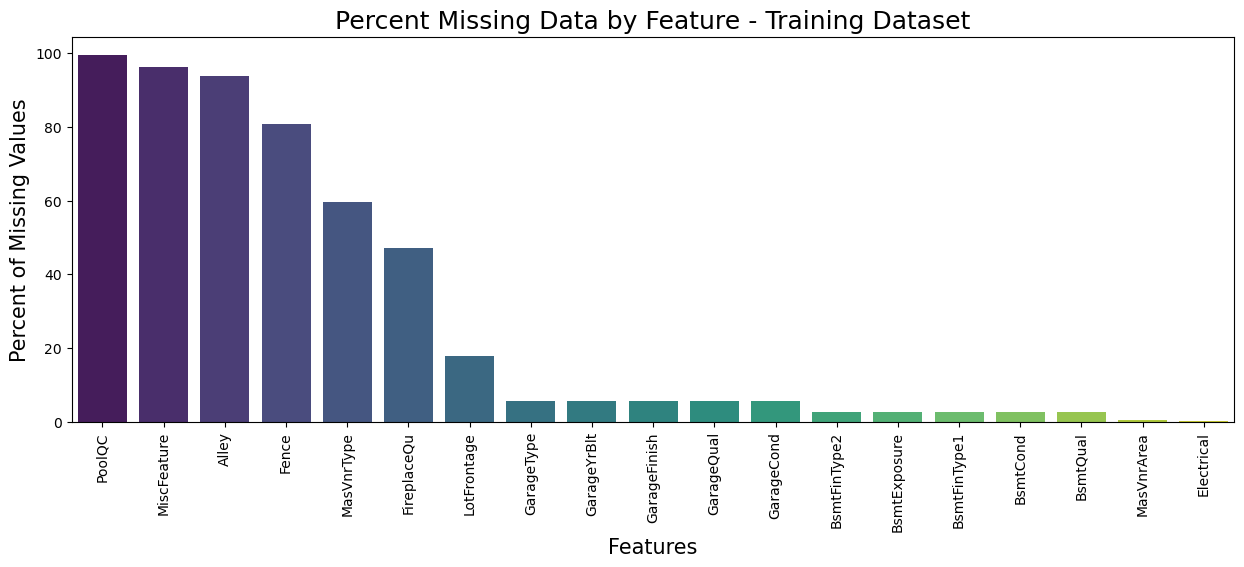

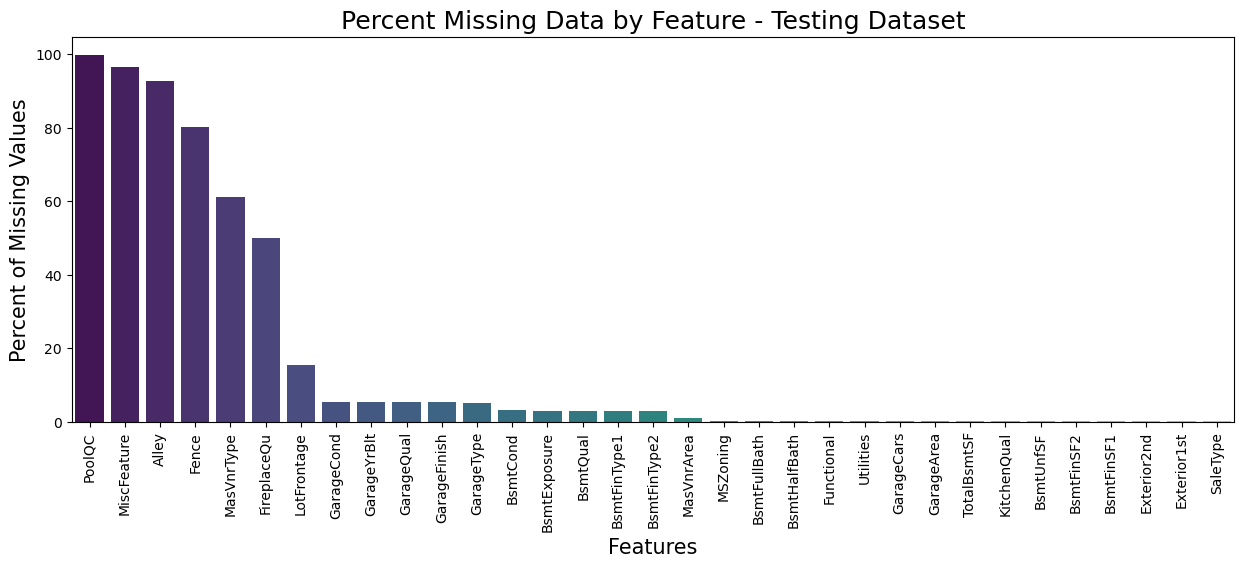

In [62]:
# Missing data Percentage Barplot

# Function to plot missing data percentage
def plot_missing_data(data, dataset_name):
    miss_data_percent = (data.isna().sum() / len(data)) * 100
    miss_data_percent = miss_data_percent.drop(miss_data_percent[miss_data_percent == 0].index).sort_values(ascending=False)
    
    if not miss_data_percent.empty:
        plt.figure(figsize=(15, 5))
        sns.barplot(x=miss_data_percent.index, y=miss_data_percent, palette="viridis")
        plt.xticks(rotation=90)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of Missing Values', fontsize=15)
        plt.title(f'Percent Missing Data by Feature - {dataset_name}', fontsize=18)
        plt.show()
    else:
        print(f"No missing data in {dataset_name}")

# Plot for each dataset
for name, data in datas:
    plot_missing_data(data, name)

In [63]:
# Convert the ordered categorical features
ordered_categories = {
    'OverallQual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'OverallCond': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
}

for name, data in datas:
    for feature, categories in ordered_categories.items():
        data[feature] = pd.Categorical(data[feature], categories=categories, ordered=True)

# Convert the unordered categorical features
unordered_features = [
    'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
]

for name, data in datas:
    for feature in unordered_features:
        data[feature] = data[feature].astype('category')

# Combining both of them to get all Categorical Features
categorical_features = list(ordered_categories.keys()) + unordered_features 

print(categorical_features)

['OverallQual', 'OverallCond', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']


In [64]:
# Define features to drop
drop_features = ['PoolQC', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'FireplaceQu']

# Drop features from each dataset
for name, data in datas:
  data.drop(drop_features, axis=1, inplace=True)

In [65]:
# Numerical Features name as a list
numerical_features = data_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_features)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']


### Filling Missing Values LotFrontage

In [66]:
for name, data in datas:

    LotFrontage_missdata_bef = data['LotFrontage'].isna().sum()

    # Step 1: Calculate the count of each BldgType within each Neighborhood
    neighborhood_lotfrontage_counts = data_copy.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].size().unstack().fillna(0)

    # Step 2: Determine the BldgType with the largest count for each Neighborhood
    predominant_bldgtype = neighborhood_lotfrontage_counts.idxmax(axis=1)

    # Step 3: Calculate the median LotFrontage for each predominant BldgType within each Neighborhood
    predominant_bldgtype_median_lotfrontage = {}
    for neighborhood in data['Neighborhood'].unique():
        predominant_type = predominant_bldgtype.loc[neighborhood]
        median_lotfrontage = data.loc[(data['Neighborhood'] == neighborhood) & (data['BldgType'] == predominant_type), 'LotFrontage'].median()
        predominant_bldgtype_median_lotfrontage[neighborhood] = median_lotfrontage

    # Step 4: Fill missing LotFrontage values based on the calculated medians
    for neighborhood, median_lotfrontage in predominant_bldgtype_median_lotfrontage.items():
        # Filter rows with missing LotFrontage in this neighborhood
        missing_lotfrontage_index = data[(data['Neighborhood'] == neighborhood) & (data['LotFrontage'].isna())].index
        
        # Fill missing values for these specific rows
        data.loc[missing_lotfrontage_index, 'LotFrontage'] = median_lotfrontage

    LotFrontage_missdata_aft = data['LotFrontage'].isna().sum()

     # Print number of missing values left
    print(f'\n\n\n{name}["LotFrontage"] missing values:\n')
    print('Number of missing values in feature LotFrontage before imputing:',LotFrontage_missdata_bef)
    print('Number of missing values in feature LotFrontage after imputing:',LotFrontage_missdata_aft)




Training Dataset["LotFrontage"] missing values:

Number of missing values in feature LotFrontage before imputing: 259
Number of missing values in feature LotFrontage after imputing: 0



Testing Dataset["LotFrontage"] missing values:

Number of missing values in feature LotFrontage before imputing: 227
Number of missing values in feature LotFrontage after imputing: 0


### Filling Missing Values Garage Features

**Strategy for filling missing Garage Features**

From features description, we came to know that for the rows with NA value means no Garage.

- GarageQual: Garage quality

    - Ex	Excellent
    - Gd	Good
    - TA	Typical/Average
    - Fa	Fair
    - Po	Poor
    - NA	No Garage
		
- GarageCond: Garage condition

    - Ex	Excellent
    - Gd	Good
    - TA	Typical/Average
    - Fa	Fair
    - Po	Poor
    - NA	No Garage

Upon checking the unique values across the above Garage Features, we get:

['TA', NaN, 'Fa', 'Gd', 'Po']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']<br>
['TA', NaN, 'Fa', 'Gd', 'Po', 'Ex']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']

Based on this we observed that, Instead of allocating **'NA'** for *'No Garage'* they have been given (missing) **NaN** value.

**So, we will put 'NA' value for all missing values across categorical Garage Features.**

Also, we found that they have missing values across same rows for both Training dataset and Testing Dataset (except for Testing dataset 2 rows (index 2127 and index 2577) for which all Garage features are missing except GarageType. **So we will delete these 2 rows (index 2127 and index 2577) from Testing Dataset**)

Similarly, For Numerical Garage Features for both Training and Testing Dataset, the missing values are as follows:

- Training Dataset:
    - GarageYrBlt    81 Missing Values

- Testing Dataset:
    - GarageYrBlt    76 Missing Values (after dropping index 2127 and index 2577 mentioned previously)
    - GarageCars     (1 Missing value was at index 2577, which we already decided to drop)
    - GarageArea     (1 Missing value was at index 2577, which we already decided to drop)

We confirmed that feature GarageYrBlt missing values are for the houses with *NO GARAGE*, So we'll impute **0** for those.

In [67]:
# Droping rows with index 2127 and index 2577 from testing dataset
garage_categorical_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Print initial missing values
for name, data in datas:
    print(f'\n{name} Garage Features missing values before dropping:\n')
    print(data[garage_categorical_features + ["GarageYrBlt"]].isna().sum())

# Drop rows from df_test
print("\nShape of Test Dataset before Droping 2 rows: ", df_test.shape)
df_test = df_test.drop(index=[2127, 2577])
print("\nShape of Test Dataset after Droping 2 rows: ", df_test.shape)

# Update the datas list with the new df_test
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

# Print the missing values and shape after dropping rows
for name, data in datas:
    print(f'\n{name} Garage Features missing values after dropping:\n')
    print(data[garage_categorical_features + ["GarageYrBlt"]].isna().sum())


Training Dataset Garage Features missing values before dropping:

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
GarageYrBlt     81
dtype: int64

Testing Dataset Garage Features missing values before dropping:

GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
GarageYrBlt     78
dtype: int64

Shape of Test Dataset before Droping 2 rows:  (1459, 73)

Shape of Test Dataset after Droping 2 rows:  (1457, 73)

Training Dataset Garage Features missing values after dropping:

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
GarageYrBlt     81
dtype: int64

Testing Dataset Garage Features missing values after dropping:

GarageType      76
GarageFinish    76
GarageQual      76
GarageCond      76
GarageYrBlt     76
dtype: int64


In [68]:
# Filling Missing values across categorical garage features
garage_categorical_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for name, data in datas:
    data['GarageType'] = data['GarageType'].cat.add_categories(['NA'])
    for feature in garage_categorical_features:
        missing_value_bef = data[feature].isna().sum()
        data[feature] = data[feature].fillna('NA')
        missing_value_aft = data[feature].isna().sum()
        # Print number of missing values left
        print(f'\n\n\n{name}["{feature}"] missing values:\n')
        print(f'Number of missing values in feature {feature} before imputing:', missing_value_bef)
        print(f'Number of missing values in feature {feature} after imputing:', missing_value_aft)

# Filling Missing values across GarageYrBlt (Numerical Feature)
for name, data in datas:
    missing_value_bef = data["GarageYrBlt"].isna().sum()
    data["GarageYrBlt"] = data["GarageYrBlt"].fillna('0')
    missing_value_aft = data["GarageYrBlt"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["{"GarageYrBlt"}"] missing values:\n')
    print(f'Number of missing values in feature "GarageYrBlt" before imputing:', missing_value_bef)
    print(f'Number of missing values in feature "GarageYrBlt" after imputing:', missing_value_aft)





Training Dataset["GarageType"] missing values:

Number of missing values in feature GarageType before imputing: 81
Number of missing values in feature GarageType after imputing: 0



Training Dataset["GarageFinish"] missing values:

Number of missing values in feature GarageFinish before imputing: 81
Number of missing values in feature GarageFinish after imputing: 0



Training Dataset["GarageQual"] missing values:

Number of missing values in feature GarageQual before imputing: 81
Number of missing values in feature GarageQual after imputing: 0



Training Dataset["GarageCond"] missing values:

Number of missing values in feature GarageCond before imputing: 81
Number of missing values in feature GarageCond after imputing: 0



Testing Dataset["GarageType"] missing values:

Number of missing values in feature GarageType before imputing: 76
Number of missing values in feature GarageType after imputing: 0



Testing Dataset["GarageFinish"] missing values:

Number of missing values in 

### Filling Missing Values Basement Features

**Strategy for filling missing Basement Features**

From features description, we came to know that for the rows with NA value means no Basement.

- BsmtQual: Evaluates the height of the basement

    - Ex	Excellent (100+ inches)
    - Gd	Good (90-99 inches)
    - TA	Typical (80-89 inches)
    - Fa	Fair (70-79 inches)
    - Po	Poor (<70 inches)
    - NA	No Basement
		
- BsmtCond: Evaluates the general condition of the basement


    - Ex	Excellent
    - Gd	Good
    - TA	Typical - slight dampness allowed
    - Fa	Fair - dampness or some cracking or settling
    - Po	Poor - Severe cracking, settling, or wetness
    - NA	No Basement

Upon checking the unique values across the above mentioned Basement Features, we get:

['Gd', 'TA', 'Ex', NaN, 'Fa']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']<br>
['TA', 'Gd', NaN, 'Fa', 'Po']<br>
Categories (6, object): ['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']

Based on this we observed that, Instead of allocating **'NA'** for *'No Basement'* they have been given (missing) **NaN** value.

**So, we will put 'NA' value for all missing values across Categorical Basement Features.**

Also, we found that for both Training Dataset and Testing Dataset, they have missing values across Categorical Features ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'] of same rows as follows: 

- Number of rows with missing values across all specified features (Training Dataset): 37
- Number of rows with missing values across all specified features (Testing Dataset): 42

Except for Training dataset 2 rows (index 333 and index 949) for which all Basement features are missing except 'BsmtExposure' and 'BsmtFinType2'. <br>
**So we will delete these 2 rows (index 333 and index 949) from Training Dataset**<br><br>

Similarly, for Testing dataset 7 rows (index 1488, index 2041, index 2186, index 2218, index 2219, index 2349, index 2525) for which all Basement features are missing except 'BsmtQual', 'BsmtCond', 'BsmtExposure'.<br>
**So we will delete these 7 rows (index 1488, index 2041, index 2186, index 2218, index 2219, index 2349, index 2525) from Testing Dataset**<br><br>

Similarly, For Numerical Basement Features, the missing values are only for the Testing Dataset:

- Testing Dataset:
    - BsmtFinSF1      1
    - BsmtFinSF2      1
    - BsmtUnfSF       1
    - TotalBsmtSF     1
    - BsmtFullBath    2
    - BsmtHalfBath    2

We confirmed that these numerical features have missing values for the houses with *NO BASEMENT*, So we'll impute **0** for those.

In [69]:
for name, data in datas:
    # Check for rows where all specified features are missing
    missing_all_features = data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().all(axis=1)

    # Count the number of such rows
    num_missing_rows = missing_all_features.sum()

    print(f"Number of rows with missing values across all specified features of {name}: {num_missing_rows}")

Number of rows with missing values across all specified features of Training Dataset: 37
Number of rows with missing values across all specified features of Testing Dataset: 42


In [70]:
df_test.loc[[2349, 2525], ['BsmtFullBath', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtFullBath,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
2349,0.0,TA,NaN,Unf,Unf
2525,0.0,NaN,Av,ALQ,Unf


In [71]:
# Droping rows with index=[333, 949] from training dataset
# Droping rows with index=[1488, 2041, 2186, 2218, 2219, 2349, 2525] from testing dataset
basement_categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
basement_numerical_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

# Print initial missing values
for name, data in datas:
    print(f'\n{name} Basement Features missing values before dropping:\n')
    print(data[basement_categorical_features + basement_numerical_features].isna().sum())

# Drop rows from data_copy
print("\nShape of Train Dataset before Droping 2 rows: ", data_copy.shape)
data_copy = data_copy.drop(index=[333, 949])
print("\nShape of Train Dataset after Droping 2 rows: ", data_copy.shape)

# Drop rows from df_test
print("\nShape of Test Dataset before Droping 7 rows: ", df_test.shape)
df_test = df_test.drop(index=[1488, 2041, 2186, 2218, 2219, 2349, 2525])
print("\nShape of Test Dataset after Droping 7 rows: ", df_test.shape)

# Update the datas list with the new df_test
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

# Print the missing values and shape after dropping rows
for name, data in datas:
    print(f'\n{name} Basement Features missing values after dropping:\n')
    print(data[basement_categorical_features + basement_numerical_features].isna().sum())


Training Dataset Basement Features missing values before dropping:

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

Testing Dataset Basement Features missing values before dropping:

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

Shape of Train Dataset before Droping 2 rows:  (1460, 74)

Shape of Train Dataset after Droping 2 rows:  (1458, 74)

Shape of Test Dataset before Droping 7 rows:  (1457, 73)

Shape of Test Dataset after Droping 7 rows:  (1450, 73)

Training Dataset Basement Features missing values after dropping:

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
BsmtFinSF1       0
BsmtF

In [72]:
# Filling Missing values across categorical basement features
basement_categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for name, data in datas:
    for feature in basement_categorical_features:
        missing_value_bef = data[feature].isna().sum()
        data[feature] = data[feature].fillna('NA')
        missing_value_aft = data[feature].isna().sum()
        # Print number of missing values left
        print(f'\n\n\n{name}["{feature}"] missing values:\n')
        print(f'Number of missing values in feature {feature} before imputing:', missing_value_bef)
        print(f'Number of missing values in feature {feature} after imputing:', missing_value_aft)


basement_numerical_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

# Filling Missing values across GarageYrBlt (Numerical Feature)
for feature in basement_numerical_features:
    missing_value_bef = df_test[feature].isna().sum()
    df_test[feature] = df_test[feature].fillna('0')
    missing_value_aft = df_test[feature].isna().sum()
    # Print number of missing values left
    print(f'\n\n\nTesting Dataset["{feature}"] missing values:\n')
    print(f'Number of missing values in feature {feature} before imputing:', missing_value_bef)
    print(f'Number of missing values in feature {feature} after imputing:', missing_value_aft)





Training Dataset["BsmtQual"] missing values:

Number of missing values in feature BsmtQual before imputing: 37
Number of missing values in feature BsmtQual after imputing: 0



Training Dataset["BsmtCond"] missing values:

Number of missing values in feature BsmtCond before imputing: 37
Number of missing values in feature BsmtCond after imputing: 0



Training Dataset["BsmtExposure"] missing values:

Number of missing values in feature BsmtExposure before imputing: 37
Number of missing values in feature BsmtExposure after imputing: 0



Training Dataset["BsmtFinType1"] missing values:

Number of missing values in feature BsmtFinType1 before imputing: 37
Number of missing values in feature BsmtFinType1 after imputing: 0



Training Dataset["BsmtFinType2"] missing values:

Number of missing values in feature BsmtFinType2 before imputing: 37
Number of missing values in feature BsmtFinType2 after imputing: 0



Testing Dataset["BsmtQual"] missing values:

Number of missing values in fea

MsnVnr

In [73]:
for name, data in datas:
    missing_value_bef = data["MasVnrArea"].isna().sum()
    data.loc[(data["MasVnrArea"].isna()) & (data["MasVnrType"].isna()), "MasVnrArea"] = 0
    missing_value_aft = data["MasVnrArea"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["MasVnrArea"] missing values:\n')
    print(f'Number of missing values in feature "MasVnrArea" before imputing:', missing_value_bef)
    print(f'Number of missing values in feature "MasVnrArea" after imputing:', missing_value_aft)




Training Dataset["MasVnrArea"] missing values:

Number of missing values in feature "MasVnrArea" before imputing: 8
Number of missing values in feature "MasVnrArea" after imputing: 0



Testing Dataset["MasVnrArea"] missing values:

Number of missing values in feature "MasVnrArea" before imputing: 15
Number of missing values in feature "MasVnrArea" after imputing: 0


In [74]:
for name, data in datas:
    data['MasVnrType'] = data['MasVnrType'].astype('category').cat.add_categories(['None'])
    missing_value_bef = data["MasVnrType"].isna().sum()
    data.loc[(data["MasVnrType"].isna()) & (data["MasVnrArea"] == 0), "MasVnrType"] = "None"
    missing_value_aft = data["MasVnrType"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["MasVnrType"] missing values:\n')
    print(f'Number of missing values in feature "MasVnrType" before imputing:', missing_value_bef)
    print(f'Number of missing values in feature "MasVnrType" after imputing:', missing_value_aft)




Training Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before imputing: 872
Number of missing values in feature "MasVnrType" after imputing: 5



Testing Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before imputing: 888
Number of missing values in feature "MasVnrType" after imputing: 3


In [75]:
for name, data in datas:
    missing_value_bef = data["MasVnrType"].isna().sum()
   
    # Dropping rows with remaining missing values in "MasVnrType"
    print(f"\n\nShape of {name} before dropping rows across remaining missing values of MasVnrType: ", data.shape)
    data = data.dropna(subset=['MasVnrType'])
    print(f"Shape of {name} after dropping rows across remaining missing values of MasVnrType: ", data.shape)

    # Update the datas list with the new df_test
    if name == "Training Dataset":
        data_copy = data
        datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]
    elif name == "Testing Dataset":
        df_test = data
        datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

    missing_value_aft = data["MasVnrType"].isna().sum()
    # Print number of missing values left
    print(f'\n\n\n{name}["MasVnrType"] missing values:\n')
    print(f'Number of missing values in feature "MasVnrType" before dropping rows:', missing_value_bef)
    print(f'Number of missing values in feature "MasVnrType" after dropping rows:', missing_value_aft)




Shape of Training Dataset before dropping rows across remaining missing values of MasVnrType:  (1458, 74)
Shape of Training Dataset after dropping rows across remaining missing values of MasVnrType:  (1453, 74)



Training Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before dropping rows: 5
Number of missing values in feature "MasVnrType" after dropping rows: 0


Shape of Testing Dataset before dropping rows across remaining missing values of MasVnrType:  (1450, 73)
Shape of Testing Dataset after dropping rows across remaining missing values of MasVnrType:  (1447, 73)



Testing Dataset["MasVnrType"] missing values:

Number of missing values in feature "MasVnrType" before dropping rows: 3
Number of missing values in feature "MasVnrType" after dropping rows: 0


Electrical

In [76]:
missing_value_bef = data_copy["Electrical"].isna().sum()

# Dropping rows with remaining missing values in "Electrical"
print(f"\n\nShape of Training Dataset before dropping rows across remaining missing values of Electrical: ", data_copy.shape)
data_copy = data_copy.dropna(subset=['Electrical'])
print(f"Shape of Training Dataset after dropping rows across remaining missing values of Electrical: ", data_copy.shape)

# Update the datas list with the new df_test
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

missing_value_aft = data_copy["Electrical"].isna().sum()
# Print number of missing values left
print(f'\n\n\nTraining Dataset["Electrical"] missing values:\n')
print(f'Number of missing values in feature "Electrical" before dropping rows:', missing_value_bef)
print(f'Number of missing values in feature "Electrical" after dropping rows:', missing_value_aft)



Shape of Training Dataset before dropping rows across remaining missing values of Electrical:  (1453, 74)
Shape of Training Dataset after dropping rows across remaining missing values of Electrical:  (1452, 74)



Training Dataset["Electrical"] missing values:

Number of missing values in feature "Electrical" before dropping rows: 1
Number of missing values in feature "Electrical" after dropping rows: 0


In [77]:
miss_values_feats_df_test = ["MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "KitchenQual", "Functional", "SaleType"]

missing_value_bef = df_test[miss_values_feats_df_test].isna().sum()

# Dropping rows with remaining missing values in miss_values_feats_df_test
print(f"\n\nShape of Training Dataset before dropping rows across remaining missing values of miss_values_feats_df_test: ", df_test.shape)
df_test = df_test.dropna(subset=miss_values_feats_df_test)
print(f"Shape of Training Dataset after dropping rows across remaining missing values of miss_values_feats_df_test: ", df_test.shape)

# Update the datas list with the new df_test
datas = [('Training Dataset', data_copy), ('Testing Dataset', df_test)]

missing_value_aft = df_test[miss_values_feats_df_test].isna().sum()
# Print number of missing values left
print(f'\n\n\nTraining Dataset[miss_values_feats_df_test] missing values:\n')
print(f'Number of missing values in feature miss_values_feats_df_test before dropping rows:\n', missing_value_bef)
print(f'Number of missing values in feature miss_values_feats_df_test after dropping rows:\n', missing_value_aft)



Shape of Training Dataset before dropping rows across remaining missing values of miss_values_feats_df_test:  (1447, 73)
Shape of Training Dataset after dropping rows across remaining missing values of miss_values_feats_df_test:  (1438, 73)



Training Dataset[miss_values_feats_df_test] missing values:

Number of missing values in feature miss_values_feats_df_test before dropping rows:
 MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64
Number of missing values in feature miss_values_feats_df_test after dropping rows:
 MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64


In [78]:
for name, data in datas:
    print(f"{name}:\nMissing/Null values across columns:\n")
    print(data.isna().sum())

Training Dataset:
Missing/Null values across columns:

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr  

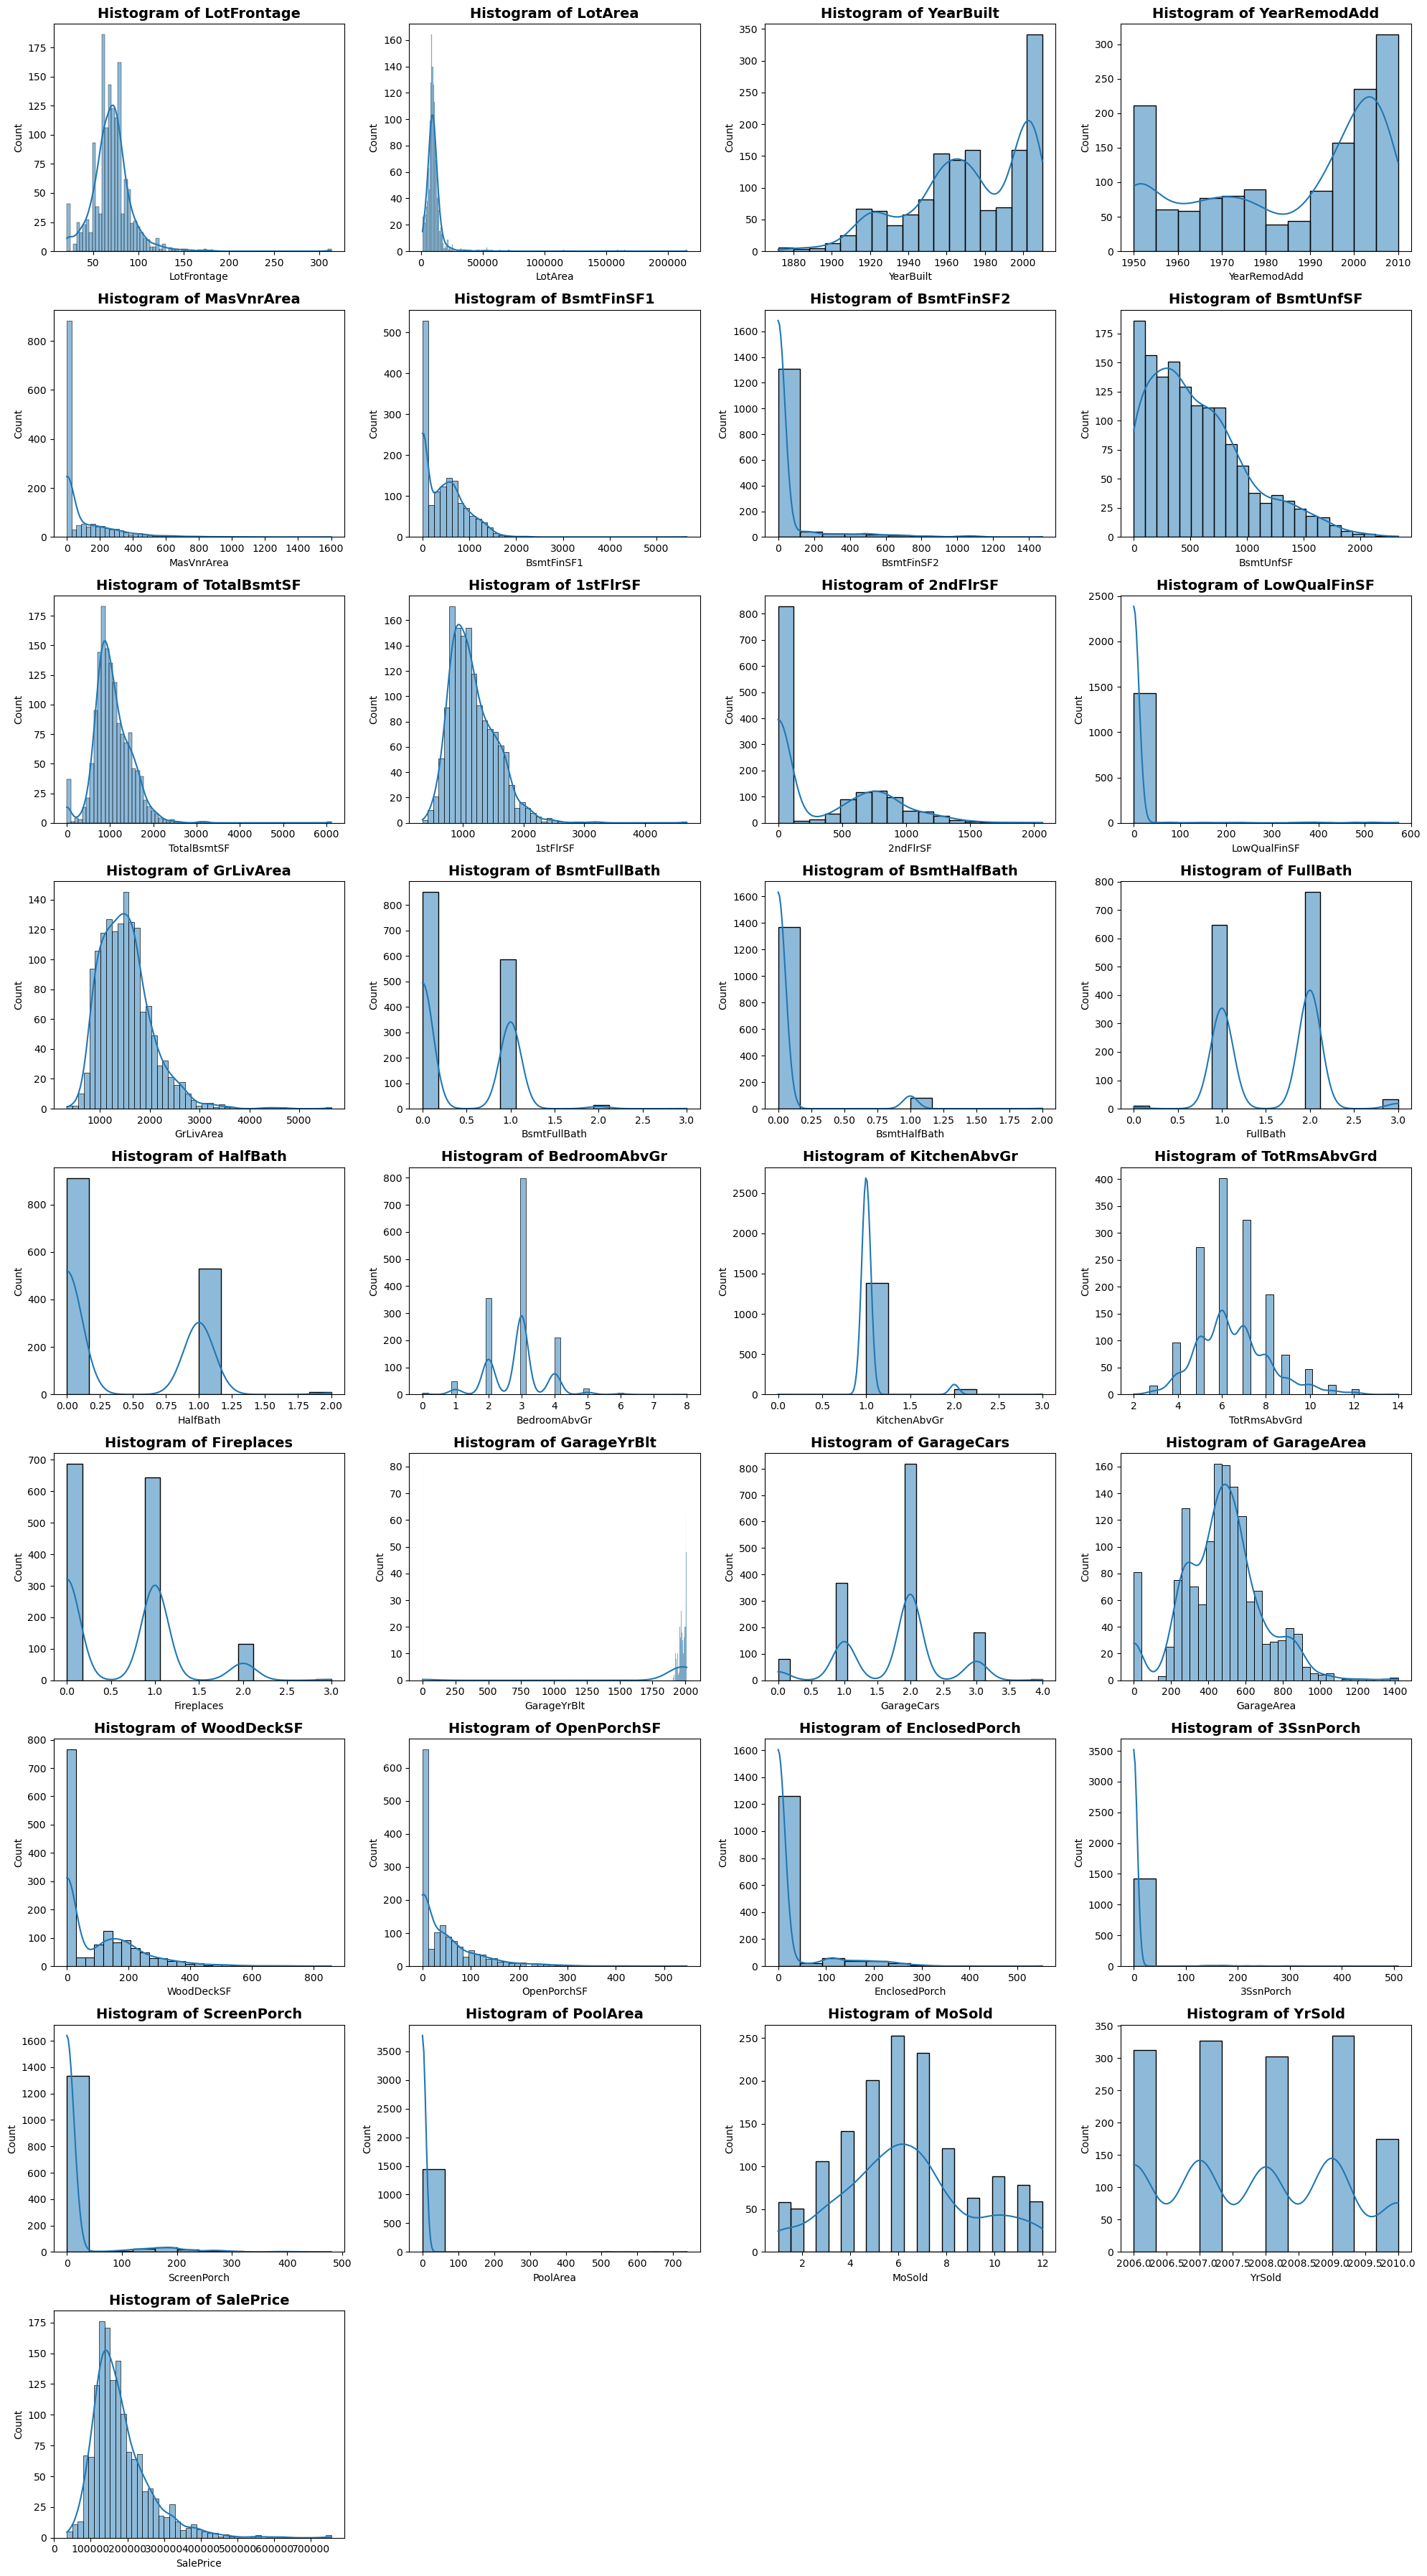

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = 4  # Number of columns in subplot grid
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate number of rows needed

# Set the figure size with equal width and height for square plots
plt.figure(figsize=(20, num_rows * 4))  # Adjust height accordingly

# Plot histograms
for i, col in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data_copy[col], kde=True)
    
    # Add title with bold font and adjust margins
    plt.title(f'Histogram of {col}', fontsize=14, fontweight='bold')
    
    # Adjust the margin above the title for subplots in the second row and beyond
    if i > num_cols:
        plt.gca().title.set_position([0.5, 1.05])  # Move the title up slightly

plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 4, not 5

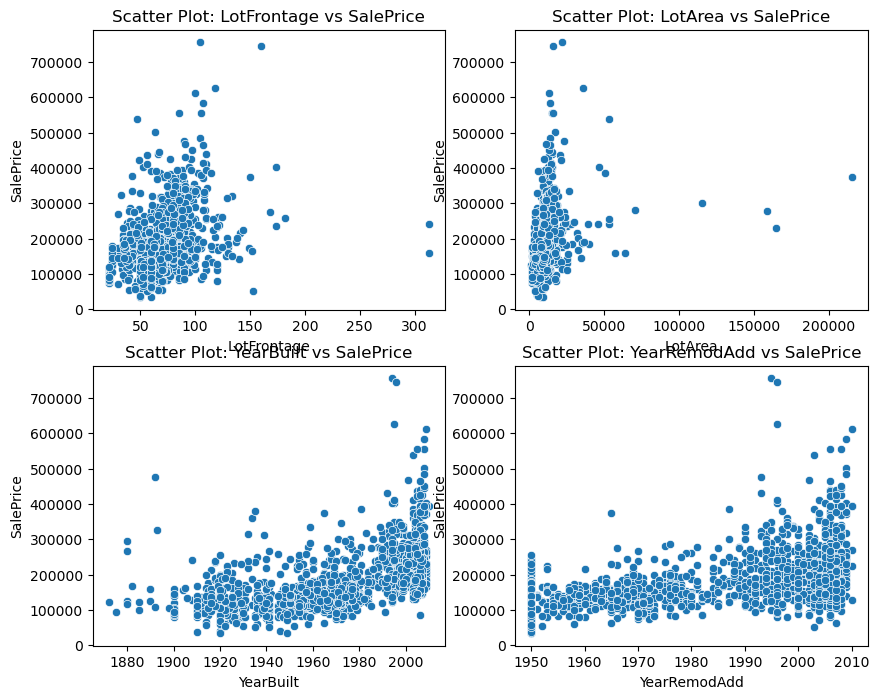

In [84]:
# Scatter Plots with SalePrice
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data_copy[col], y=data_copy['SalePrice'])
    plt.title(f'Scatter Plot: {col} vs SalePrice')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X_train = data_copy.drop('SalePrice', axis=1)
y_train = data_copy['SalePrice']

# One-hot encode categorical features
# X_train_encoded = pd.get_dummies(X_train)

# Label encode categorical features
X_train_encoded = X_train.copy()
label_encoder = LabelEncoder()
for col in X_train_encoded.columns:
    if X_train_encoded[col].dtype == 'object':
        X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Feature importance using Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train_imputed, y_train)
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X_train_encoded.columns).sort_values(ascending=False)

# Select top 20 features from Random Forest
top_features_rf = feature_importance.head(20).index

# Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=20)
fit = rfe.fit(X_train_imputed, y_train)
top_features_rfe = X_train_encoded.columns[fit.support_]

# Combine selected features
selected_features = list(set(top_features_rf) | set(top_features_rfe))

# Print selected features
print("Selected Features:", selected_features)


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X_train = data_copy.drop('SalePrice', axis=1)
y_train = data_copy['SalePrice']

# One-hot encode categorical features
# X_train_encoded = pd.get_dummies(X_train)

# Label encode categorical features
X_train_encoded = X_train.copy()
label_encoder = LabelEncoder()
for col in X_train_encoded.columns:
    if X_train_encoded[col].dtype == 'object':
        X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Feature importance using Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train_imputed, y_train)
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X_train_encoded.columns).sort_values(ascending=False)

# Select top 20 features from Random Forest
top_features_rf = feature_importance.head(20).index

# Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=20)
fit = rfe.fit(X_train_imputed, y_train)
top_features_rfe = X_train_encoded.columns[fit.support_]

# Combine selected features
selected_features = list(set(top_features_rf) | set(top_features_rfe))

# Print selected features
print("Selected Features:", selected_features)


Selected Features: ['GrLivArea', 'BsmtHalfBath', 'BsmtUnfSF', 'OverallQual', 'MasVnrArea', 'PoolQC', 'Fireplaces', 'LotArea', 'GarageType', 'Alley', 'LotFrontage', 'PavedDrive', 'RoofStyle', 'TotRmsAbvGrd', 'FullBath', 'BldgType', 'RoofMatl', 'BsmtFinSF1', 'Neighborhood', 'WoodDeckSF', 'LandSlope', 'TotalBsmtSF', 'OpenPorchSF', 'BsmtFullBath', 'YearRemodAdd', '1stFlrSF', 'KitchenAbvGr', 'Utilities', 'Street', 'KitchenQual', 'GarageCars', '2ndFlrSF', 'BsmtQual', 'GarageArea', 'ExterQual', 'YearBuilt']


In [ ]:
# Separate features and target
# X_train = data_copy.drop('SalePrice', axis=1)
# y_train = data_copy['SalePrice']

# One-hot encode categorical features
# X_train_encoded = pd.get_dummies(X_train)

# Combine the encoded features with the target variable
data_combined = pd.concat([X_train_encoded, y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_combined.corr()

# Get the correlation of features with 'SalePrice'
correlation_with_saleprice = correlation_matrix['SalePrice']

# Filter the correlation to only include the selected features
correlation_selected_features = correlation_with_saleprice[selected_features]

# Sort the correlation values in descending order
correlation_selected_features_sorted = correlation_selected_features.sort_values(ascending=False)

# Display the sorted correlation values
print(correlation_selected_features_sorted)


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotArea         0.263843
PavedDrive      0.231357
BsmtFullBath    0.227122
RoofStyle       0.222405
BsmtUnfSF       0.214479
Neighborhood    0.210851
Alley           0.139868
RoofMatl        0.132383
LandSlope       0.051152
Street          0.041036
Utilities      -0.014314
BsmtHalfBath   -0.016844
BldgType       -0.085591
PoolQC         -0.126070
KitchenAbvGr   -0.135907
GarageType     -0.415283
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
Name: SalePrice, dtype: float64


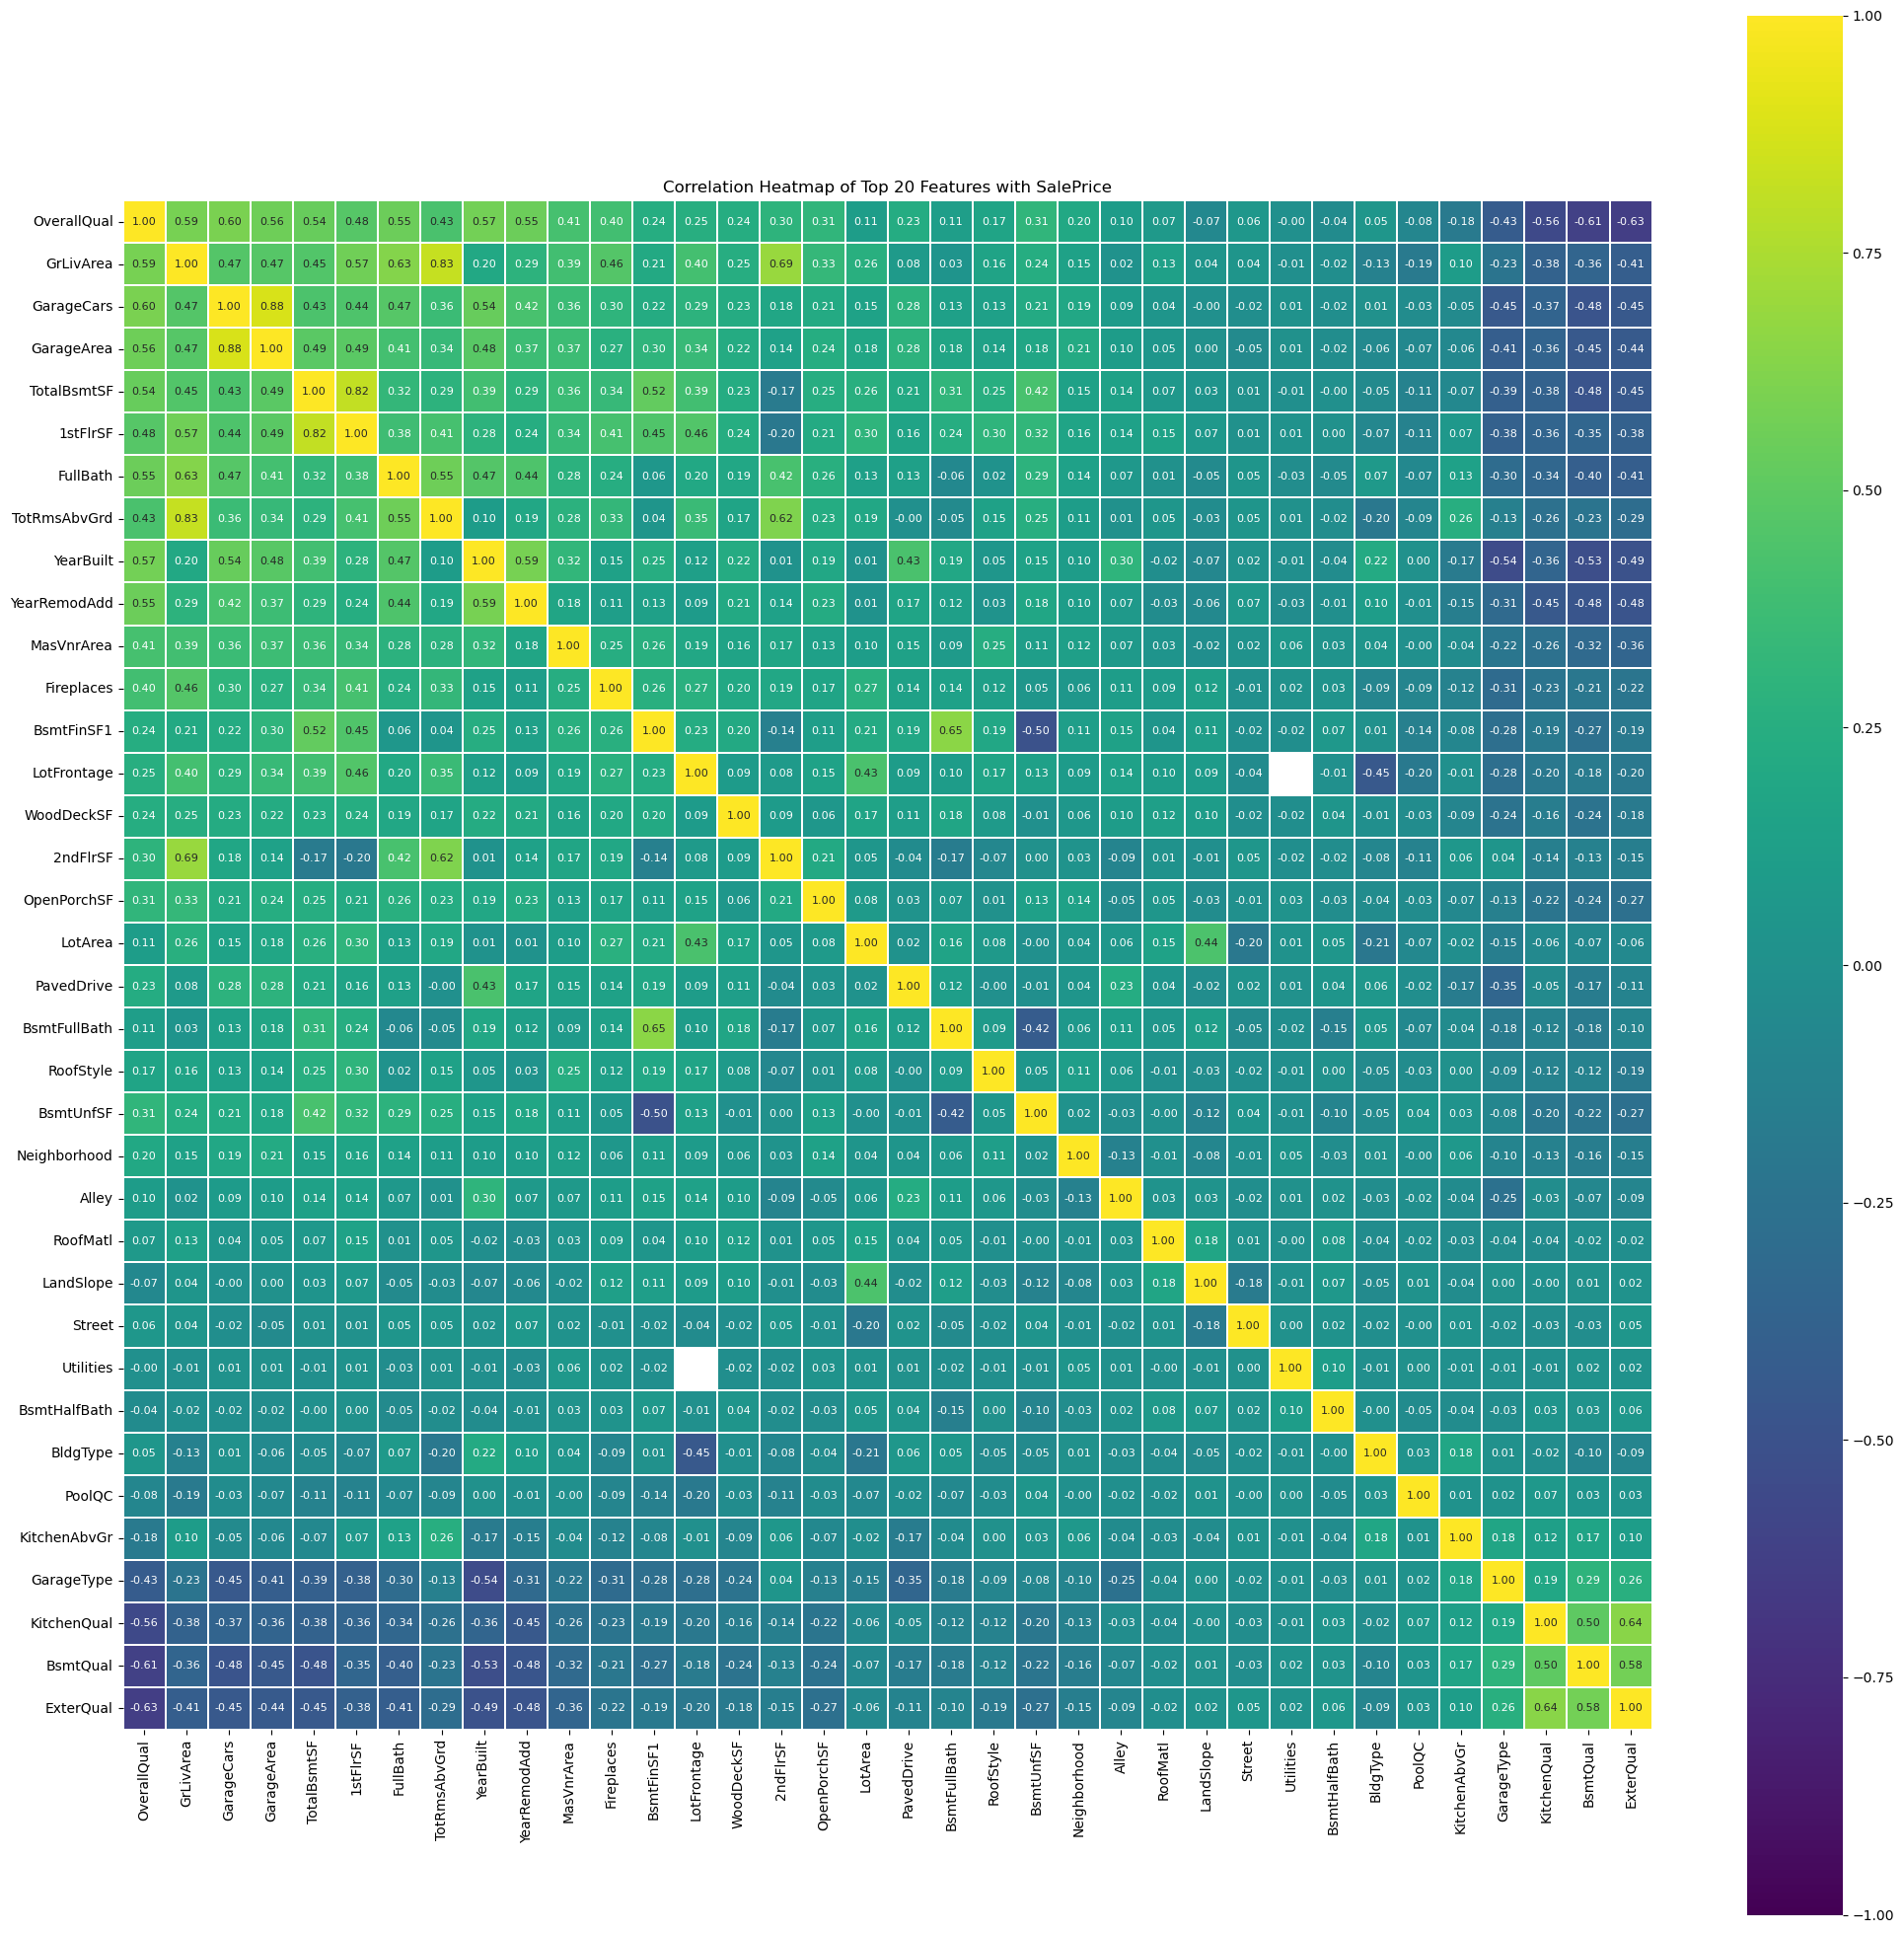

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 20 features based on correlation with SalePrice
top_features = correlation_selected_features_sorted.index

# Extract the correlation matrix for these features
corr_top_features = data_combined[top_features].corr()

# Create a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_top_features, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f', linewidths=0.1, annot_kws={"size": 8}, square=True)
plt.title('Correlation Heatmap of Top 20 Features with SalePrice')
plt.show()